# A hands-on introduction to Natural Language Processing
#### 23rd March, 2022 for IBM Call for Code
## Pre-requisites
Please have the pre-requisites ready on your machine. 

![Typing cat gif](https://media.giphy.com/media/o0vwzuFwCGAFO/giphy.gif)

```jupyter notebook``` opens up a Jupyter notebook in your browser at default port 8888.

## NLTK
Natural Language Toolkit is the most popular collection of libraries and programs to do NLP. You can find more about it here: http://www.nltk.org/book/ch00.html. We will mainly be using NLTK to perform different tasks, along with a few other packages.

In [14]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')

import warnings
warnings.filterwarnings('ignore')  # Ignoring warnings

[nltk_data] Downloading package punkt to /Users/gjena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /Users/gjena/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


NLTK comes pre-loaded with texts from the *Project Gutenberg* archive that you can use. It also has a collection of informal text from discussion forums, conversations, chat sessions, movie scripts, etc. NLTK has corpora in other languages as well.

In [150]:
from nltk.corpus import gutenberg

# Printing the first 100 characters of each of the files
for fileid in gutenberg.fileids():
    print(fileid, gutenberg.raw(fileid)[:100], '...')


austen-emma.txt [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a ...
austen-persuasion.txt [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire ...
austen-sense.txt [Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle ...
bible-kjv.txt [The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called  ...
blake-poems.txt [Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS  ...
bryant-stories.txt [Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     T ...
burgess-busterbrown.txt [The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Bu ...
carroll-alice.txt [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was ...
chesterton-ball.txt [The Ba

## Getting the data
![Fetch data](https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif)

Data can come from a variety of sources in different formats. Natural language can be in the form of text or speech. For the purpose of this tutorial, we will be focusing on text-based processing as opposed to speech recognition and synthesis. Textual data can be stored in databases, dataframes, text files, webpages, etc. A list of text datasets can be found here: https://github.com/niderhoff/nlp-datasets. <br>

Let's create a list with a few sentences that will serve as the sample data.

In [15]:
sample_data = ["Today is 23rd March. I am in San Francisco, California. Currently I am " \
                "attending a Natural Language Processing workshop."]
print('\nSample data', sample_data)


Sample data ['Today is 23rd March. I am in San Francisco, California. Currently I am attending a Natural Language Processing workshop.']


You can also scrape a webpage using the `requests` and `lxml` libraries. Let's trying scraping a paragraph from the landing page for IBM Call for Code. Use 'Inspect' functionality of your browser for the webpage to get the XPath for a particular element. 

In [11]:
from lxml import html
import requests

# Scraping data from a webpage element
page = requests.get('https://developer.ibm.com/callforcode/')
tree = html.fromstring(page.content)
webpage_data = tree.xpath('////*[@id="about"]/div/div/div[1]/p/text()') 

# Iterating over all the elements
conference_data = []
for item in webpage_data:
    conference_data.append(item)
print('\nConference data:', conference_data)


Conference data: ['Through Call for Code, top solutions are actively supported to bring the technology into communities in need, working with partners like the United Nations and the Linux Foundation. Deployments are underway across the globe.\xa0']


## Sentence segmentation
A paragraph is nothing but a collection of sentences. Also called sentence tokenization or sentence boundary disambiguation, this process breaks up sentences by deciding where a sentence starts and ends. Challenges include recognizing ambiguous puncutation marks. For example, `.` can be used for a decimal point, an ellipsis or a period. Let's use ```sent_tokenize``` from ```nltk.tokenize``` to get sentences.

In [16]:
from nltk.tokenize import sent_tokenize

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print('\nSentence tokens:', sentences)
    return sentences

In [17]:
sample_sentences = get_sent_tokens(sample_data)


Sentence tokens: ['Today is 23rd March.', 'I am in San Francisco, California.', 'Currently I am attending a Natural Language Processing workshop.']


In [18]:
conference_sentences = get_sent_tokens(conference_data)


Sentence tokens: ['Through Call for Code, top solutions are actively supported to bring the technology into communities in need, working with partners like the United Nations and the Linux Foundation.', 'Deployments are underway across the globe.']


## Word tokenization
A sentence is a collection of words. Word tokenization is similar to sentence tokenization, but works on words. Let's use ```word_tokenize``` from ```nltk.tokenize``` to get the words. 

In [19]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print('\nWord tokens:', words)
    return(words)

In [20]:
sample_words = get_word_tokens(sample_sentences)


Word tokens: ['Today', 'is', '23rd', 'March', '.', 'I', 'am', 'in', 'San', 'Francisco', ',', 'California', '.', 'Currently', 'I', 'am', 'attending', 'a', 'Natural', 'Language', 'Processing', 'workshop', '.']


In [21]:
conference_words = get_word_tokens(conference_sentences)


Word tokens: ['Through', 'Call', 'for', 'Code', ',', 'top', 'solutions', 'are', 'actively', 'supported', 'to', 'bring', 'the', 'technology', 'into', 'communities', 'in', 'need', ',', 'working', 'with', 'partners', 'like', 'the', 'United', 'Nations', 'and', 'the', 'Linux', 'Foundation', '.', 'Deployments', 'are', 'underway', 'across', 'the', 'globe', '.']


## Frequency distribution
Calculates the frequency distribution for each word in the data. Use ```nltk.probability``` from ```FreqDist``` and ```matplotlib```.

In [22]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    '''Frequency distribution'''
    fdist = FreqDist(words)
    fdist.plot(num_words, cumulative=False)

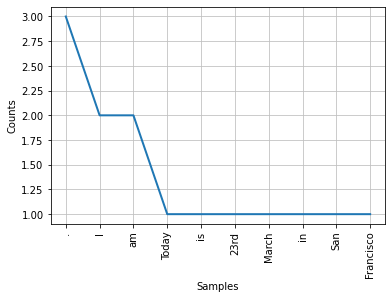

In [23]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

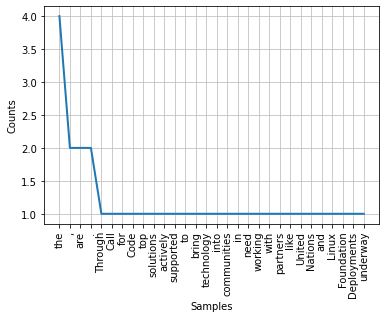

In [24]:
plot_freq_dist(conference_words, num_words=30)

## Cleaning the data
![Cleaning data](https://media.giphy.com/media/10zsjaH4g0GgmY/giphy.gif)

Oops, we missed a crucial step! Real world data is often messy and needs to undergo cleaning. You can do a bunch of preprocessing to ensure the data is clean, like:
- Removing special characters and numbers - These are usually not important when trying to derive the semantics
- Removing stopwords - A special category of words that don't have any significance on their own and are often used as filler words or to ensure correct grammer. Eg. the, and, but, of, is, or, those, her, 
- Removing HTML tags - Raw data from webpages can often be laden with HTML tags. Use a library like `BeautifulSoup` to process and remove the tags.
- Standardizing words - This aims to consolidate different versions of the same version Eg. SMS/Twitter language, slang, misspellings 
- Converting to lower case - To ensure uniformity across all words


In [25]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_clean_sentences(sentences, remove_digits=False):
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent)
        clean_text = clean_text.lower()  # Converting to lower case
        clean_sentences.append(clean_text)
    print('\nClean sentences:', clean_sentences)
    return clean_sentences

def filter_stopwords(words):
    '''Removing stopwords from given words'''
    filtered_words = [w for w in words if w not in stop_words]
    print('\nFiltered words:', filtered_words)
    return filtered_words

[nltk_data] Downloading package stopwords to /Users/gjena/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
sample_sentences = get_clean_sentences(sample_sentences, remove_digits = True)
sample_words = get_word_tokens(sample_sentences)
sample_words = filter_stopwords(sample_words)


Clean sentences: ['today is rd march', 'i am in san francisco california', 'currently i am attending a natural language processing workshop']

Word tokens: ['today', 'is', 'rd', 'march', 'i', 'am', 'in', 'san', 'francisco', 'california', 'currently', 'i', 'am', 'attending', 'a', 'natural', 'language', 'processing', 'workshop']

Filtered words: ['today', 'rd', 'march', 'san', 'francisco', 'california', 'currently', 'attending', 'natural', 'language', 'processing', 'workshop']


In [27]:
conference_sentences = get_clean_sentences(conference_sentences)
conference_words = get_word_tokens(conference_sentences)
conference_words = filter_stopwords(conference_words)


Clean sentences: ['through call for code top solutions are actively supported to bring the technology into communities in need working with partners like the united nations and the linux foundation', 'deployments are underway across the globe']

Word tokens: ['through', 'call', 'for', 'code', 'top', 'solutions', 'are', 'actively', 'supported', 'to', 'bring', 'the', 'technology', 'into', 'communities', 'in', 'need', 'working', 'with', 'partners', 'like', 'the', 'united', 'nations', 'and', 'the', 'linux', 'foundation', 'deployments', 'are', 'underway', 'across', 'the', 'globe']

Filtered words: ['call', 'code', 'top', 'solutions', 'actively', 'supported', 'bring', 'technology', 'communities', 'need', 'working', 'partners', 'like', 'united', 'nations', 'linux', 'foundation', 'deployments', 'underway', 'across', 'globe']


After cleaning the text and using tokenization, we are left with words. Words have certain properties which we'll be exploring in the next few sections. These characteristics can often be used as features for a Machine Learning model.

## POS tagging

The English language is formed of different parts of speech (POS) like nouns, verbs, pronouns, adjectives, etc. POS tagging analyzes the words in a sentences and associates it with a POS tag depending on the way it is used. Also called grammatical tagging or word-category disambiguation. Use ```nltk.pos_tag``` for the process. There are different types of tagsets used with the most common being the Penn Treebank tagset and the Universal tagset. 

![Penn POS tags](https://slideplayer.com/slide/6855236/23/images/11/Penn+TreeBank+POS+Tag+set.jpg)

In [28]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    '''Get the part of speech (POS) tags for the words'''
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gjena/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
sample_tags = get_pos_tags(sample_words)
sample_tags

[[('today', 'NN')],
 [('rd', 'NN')],
 [('march', 'NN')],
 [('san', 'NN')],
 [('francisco', 'NN')],
 [('california', 'NN')],
 [('currently', 'RB')],
 [('attending', 'VBG')],
 [('natural', 'JJ')],
 [('language', 'NN')],
 [('processing', 'NN')],
 [('workshop', 'NN')]]

In [30]:
conference_tags = get_pos_tags(conference_words)
conference_tags

[[('call', 'NN')],
 [('code', 'NN')],
 [('top', 'NN')],
 [('solutions', 'NNS')],
 [('actively', 'RB')],
 [('supported', 'VBN')],
 [('bring', 'NN')],
 [('technology', 'NN')],
 [('communities', 'NNS')],
 [('need', 'NN')],
 [('working', 'VBG')],
 [('partners', 'NNS')],
 [('like', 'IN')],
 [('united', 'JJ')],
 [('nations', 'NNS')],
 [('linux', 'NN')],
 [('foundation', 'NN')],
 [('deployments', 'NNS')],
 [('underway', 'RB')],
 [('across', 'IN')],
 [('globe', 'NN')]]

## Text processing
Text processing approaches like stemming and lemmatization help in reducing inflectional forms of words. 
### Dictionary and thesaurus
WordNet is a lexical database that also has relationships between different words. You can use synsets to find definitions, synonyms and antonyms for words. You can also find hyponyms and hypernyms using the same process. Hypernym is a generalized concept like 'programming language' whereas hyponym is a specific concept like 'Python' or 'Java'.

![Hypernym and hyponym](https://upload.wikimedia.org/wikipedia/en/thumb/1/1f/Hyponymsandhypernyms.jpg/300px-Hyponymsandhypernyms.jpg)


In [31]:
nltk.download('wordnet')
from nltk.corpus import wordnet 

def get_wordnet_properties(words):
    '''Returns definition, synonyms and antonyms of words'''
    for word in words:
        synonyms = []
        antonyms = []
#         hyponyms = []
#         hypernyms = []
        definitions = []
        for syn in wordnet.synsets(word):
            for lm in syn.lemmas():
                synonyms.append(lm.name())
                if lm.antonyms(): 
                    antonyms.append(lm.antonyms()[0].name())
#             hyponyms.append(syn.hyponyms())
#             hypernyms.append(syn.hypernyms())
#             definitions.append(syn.definition())
            
        print(word)
        print('Synonyms:', synonyms, '\nAntonyms:', antonyms, '\n')
#         print('Definition:', definitions, '\n')

[nltk_data] Downloading package wordnet to /Users/gjena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Have you watched the series 'Friends'? Do you remember the [episode](https://youtu.be/B1tOqZUNebs?t=100) where Joey has to write a letter of recommendation for Monica and Chandler for the adoption agency? He uses a thesaurus to make himself sound smarter in the letter! Let's see if we get the same results:

'They are warm, nice people with big hearts' -> 'They are humid, prepossessing Homo Sapiens with full-sized aortic pumps'

![Joey Friends](https://media.giphy.com/media/VEsfbW0pBu145PPhOi/giphy.gif)

In [32]:
joey_dialogue = ['they', 'are', 'warm', 'nice', 'people', 'with', 'big', 'hearts']
get_wordnet_properties(joey_dialogue)

they
Synonyms: [] 
Antonyms: [] 

are
Synonyms: ['are', 'ar', 'be', 'be', 'be', 'exist', 'be', 'be', 'equal', 'be', 'constitute', 'represent', 'make_up', 'comprise', 'be', 'be', 'follow', 'embody', 'be', 'personify', 'be', 'be', 'live', 'be', 'cost', 'be'] 
Antonyms: ['differ'] 

warm
Synonyms: ['warm', 'warm_up', 'warm', 'warm', 'warm', 'warm', 'affectionate', 'fond', 'lovesome', 'tender', 'warm', 'strong', 'warm', 'quick', 'warm', 'ardent', 'warm', 'warm', 'warm', 'warm', 'warmly', 'warm'] 
Antonyms: ['cool', 'cool', 'cool'] 

nice
Synonyms: ['Nice', 'nice', 'decent', 'nice', 'nice', 'skillful', 'dainty', 'nice', 'overnice', 'prissy', 'squeamish', 'courteous', 'gracious', 'nice'] 
Antonyms: ['nasty'] 

people
Synonyms: ['people', 'citizenry', 'people', 'people', 'multitude', 'masses', 'mass', 'hoi_polloi', 'people', 'the_great_unwashed', 'people', 'people'] 
Antonyms: [] 

with
Synonyms: [] 
Antonyms: [] 

big
Synonyms: ['large', 'big', 'big', 'bad', 'big', 'big', 'big', 'large', 'pr

## Word Sense Disambiguation

These synsets are also used for disambiguation, particularly Word Sense Disambiguation using Lesk Algorithm. See: http://www.nltk.org/howto/wsd.html

In [33]:
from nltk.wsd import lesk
sent = ['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.']
print(lesk(sent, 'bank', 'n'))

Synset('savings_bank.n.02')


In [34]:
sent = ['I', 'was', 'sitting', 'by', 'the', 'bank', '.']
print(lesk(sent, 'bank', 'n'))

Synset('bank.n.06')


## Stemming
Stemming tries to cut off at the ends of the words in the hope of deriving the base form. Stems aren't always real words. Use ```PorterStemmer``` from ```ntlk.stem```.

In [35]:
from nltk.stem import PorterStemmer

def get_stems(words):
    '''Reduce the words to their base word (stem) by cutting off the ends'''
    ps = PorterStemmer()
    stems = []
    for word in words:
        stems.append(ps.stem(word))
    print(stems)
    return stems

In [36]:
sample_stems = get_stems(sample_words)

['today', 'rd', 'march', 'san', 'francisco', 'california', 'current', 'attend', 'natur', 'languag', 'process', 'workshop']


In [37]:
conference_stems = get_stems(conference_words)

['call', 'code', 'top', 'solut', 'activ', 'support', 'bring', 'technolog', 'commun', 'need', 'work', 'partner', 'like', 'unit', 'nation', 'linux', 'foundat', 'deploy', 'underway', 'across', 'globe']


## Lemmatization
Lemmatization groups different inflected forms of a words so they can be mapped to the same base. Lemmas are real words. More complex than stemming, context of words is also analyzed. Uses WordNet which is a lexical English database. 
Use ```WordNetLemmatizer``` from ```nltk.stem``` and provide it the POS tag along with the word. NLTK’s POS tags are in a format different from to that of wordnet lemmatizer, so a mapping is needed. https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python


In [38]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_lemma(word_tags):
    '''Reduce the words to their base word (lemma) by using a lexicon'''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, # Mapping NLTK POS tags to WordNet POS tags
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    print(lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to /Users/gjena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
sample_lemma = get_lemma(sample_tags)

['today', 'rd', 'march', 'san', 'francisco', 'california', 'currently', 'attend', 'natural', 'language', 'processing', 'workshop']


In [40]:
conference_lemma = get_lemma(conference_tags)

['call', 'code', 'top', 'solution', 'actively', 'support', 'bring', 'technology', 'community', 'need', 'work', 'partner', 'like', 'united', 'nation', 'linux', 'foundation', 'deployment', 'underway', 'across', 'globe']


These processes can create features that act as inputs to predictive models. It also helps in using lesser memory by making the data smaller and reducing the size of the vocabulary. Often times, these normalized words are sufficient to provide the semantics. Like in the case of understanding the meaning behind the sentences:

## Distances 
You can calculate distances between words. There are a variety of distance metrics available: https://en.wikipedia.org/wiki/String_metric. The most common ones are Levenshtein, Cosine distances and Jaccard similarity. Applications include spell checking, correction for OCRs and Machine Translation. For an implementation of a spell checker, see here: https://norvig.com/spell-correct.html

![Edit distance](https://i.stack.imgur.com/5Pjr7.png)


## Named Entity Recognition (NER) 

Also known as entity chunking or extraction, is a sub-process of information extraction. This involves identifies and classifies named entities mentions into sub-categories like person name, organization, location, time, etc.  In other words, Named Entity Recognition (NER) labels sequences of words in a text which are the names of things, such as person and company names, or gene and protein names. 

Some of the most popular NER models are here: https://towardsdatascience.com/a-review-of-named-entity-recognition-ner-using-automatic-summarization-of-resumes-5248a75de175. <br>

Example use-cases include customer support, search engine, news classification. Another emerging application is for redacting personally identifiable information (PII). A great demo of NER in action is here: https://explosion.ai/demos/displacy-ent


## Text representation
### Bag of words
Bag of words is an approach for text feature extraction. Just imagine a bag of popcorn, 
and each popcorn kernel represents a word that is present in the text. Each sentence can be represented as a vector
of all the words present in a vocabulary. If a word is present in the sentence, it is 1, otherwise 0.

![Bag of words](https://cdn-images-1.medium.com/max/1600/1*zMdHVQQ7HYv_mMZ5Ne-2yQ.png)

### TF-IDF
Term-frequency inverse document frequency assigns scores to words inside a document. Commonly occuring words in all documents would have less weightage.
![TF IDF](https://cdn-images-1.medium.com/max/1600/1*g9r9kJy71m-Ry_Y6XUYLLA.gif)

In [42]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    '''Compute bag of words for sentences'''
    vectorizer = CountVectorizer()
    print('\nBag of words:', vectorizer.fit_transform(sentences).todense())
    print('\nDictionary:', vectorizer.vocabulary_) 

In [43]:
get_bag_of_words(sample_data)


Bag of words: [[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]]

Dictionary: {'today': 13, 'is': 7, '23rd': 0, 'march': 9, 'am': 1, 'in': 6, 'san': 12, 'francisco': 5, 'california': 3, 'currently': 4, 'attending': 2, 'natural': 10, 'language': 8, 'processing': 11, 'workshop': 14}


In [44]:
get_bag_of_words(conference_data)


Bag of words: [[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1]]

Dictionary: {'through': 23, 'call': 5, 'for': 9, 'code': 6, 'top': 25, 'solutions': 19, 'are': 3, 'actively': 1, 'supported': 20, 'to': 24, 'bring': 4, 'the': 22, 'technology': 21, 'into': 13, 'communities': 7, 'in': 12, 'need': 17, 'working': 29, 'with': 28, 'partners': 18, 'like': 14, 'united': 27, 'nations': 16, 'and': 2, 'linux': 15, 'foundation': 10, 'deployments': 8, 'underway': 26, 'across': 0, 'globe': 11}


### Word embeddings - Word2Vec
Vector space model - represent words and sentences as vectors to get semantic relationships. A really good tutorial for Word2Vec is here: https://www.kaggle.com/alvations/word2vec-embedding-using-gensim-and-nltk

![Word2Vec](http://www.flyml.net/wp-content/uploads/2016/11/w2v-3-samples.png)

## Machine Learning using Natural Language Processing
Machine Learning includes two approaches: supervised and unsupervised. Supervised learning works on data that already has labels i.e. they provide supervision to the model. Eg. Classification, Regression. Unsupervised learning is to find out the inherent structure present in the data and there are no labels i.e. no supervision. Eg. Clustering.

Example application: Creating an application for community members to submit issues to governing body. Classification can be used to predict which type of issue it is - sanitation, infrastructure, safety, etc.

A lot of these text properties can be used as features for Machine Learning systems. One specific case is text classification. A more detailed resource is here: https://www.nltk.org/book/ch06.html

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. More details here: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [45]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
print('Classes present:', news.target_names)
print('Number of classes present:', len(news.target_names))
print('Number of data points:', len(news.data))

Classes present: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of classes present: 20
Number of data points: 18846


In [46]:
# Printing the first few characters for each category

for text, num_label in zip(news.data[:10], news.target[:10]):
    print('[%s]:\t\t "%s ..."' % (news.target_names[num_label], text[:500].split('\n')[0]))

[rec.sport.hockey]:		 "From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu> ..."
[comp.sys.ibm.pc.hardware]:		 "From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson) ..."
[talk.politics.mideast]:		 "From: hilmi-er@dsv.su.se (Hilmi Eren) ..."
[comp.sys.ibm.pc.hardware]:		 "From: guyd@austin.ibm.com (Guy Dawson) ..."
[comp.sys.mac.hardware]:		 "From: Alexander Samuel McDiarmid <am2o+@andrew.cmu.edu> ..."
[sci.electronics]:		 "From: tell@cs.unc.edu (Stephen Tell) ..."
[comp.sys.mac.hardware]:		 "From: lpa8921@tamuts.tamu.edu (Louis Paul Adams) ..."
[rec.sport.hockey]:		 "From: dchhabra@stpl.ists.ca (Deepak Chhabra) ..."
[rec.sport.hockey]:		 "From: dchhabra@stpl.ists.ca (Deepak Chhabra) ..."
[talk.religion.misc]:		 "From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) ..."


### Dividing into training and test data sets
Think of it as learning in class (training) and then taking an exam (testing) to evaluate your performance. The testing is done on unseen data to know the actual abilities of the classifier i.e. preventing memorization or rote-learning. Test data set is usually 20-25% of the data set. You can also use cross-validation to ensure robustness of classifier.

In [47]:
from sklearn.model_selection import train_test_split
 
def train(classifier, X, y):
    """Train given classifier"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    classifier.fit(X_train, y_train)
    print("\nAccuracy:", classifier.score(X_test, y_test))
    return classifier

### Naive Bayes
Probabilistic classifier based on Bayes theorem. Assumes independence among the features. Details here: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

We'll be using Pipeline to apply transformations sequentially: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Adapted from: https://nlpforhackers.io/text-classification/


#### Feature: TF-IDF 

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
 
model_1 = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])

In [49]:
print('Results for TF-IDF as feature:')
train(model_1, news.data, news.target)

Results for TF-IDF as feature:

Accuracy: 0.8463497453310697


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

#### Feature: TF i.e. Removing IDF from TF-IDF

In [50]:
model_2 = Pipeline([('vectorizer', TfidfVectorizer(use_idf=False)),
                    ('classifier', MultinomialNB())])

In [51]:
print('Results for TF as feature, removing IDF')
train(model_2, news.data, news.target)

Results for TF as feature, removing IDF

Accuracy: 0.756578947368421


Pipeline(steps=[('vectorizer', TfidfVectorizer(use_idf=False)),
                ('classifier', MultinomialNB())])

So, IDF does make a huge difference!

#### Feature: TF-IDF + stopwords removal

In [52]:
model_3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                    ('classifier', MultinomialNB())])

In [53]:
print('Results for TF-IDF as feature, using stopword removal:')
train(model_3, news.data, news.target)

Results for TF-IDF as feature, using stopword removal:

Accuracy: 0.8777589134125636


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

#### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 5
Trying simple things may work too!

In [54]:
model_4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5)),
                    ('classifier', MultinomialNB())])

In [55]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 5:')
train(model_4, news.data, news.target)

Results for TF-IDF + stopwords removal + ignoring words with frequency < 5:

Accuracy: 0.8820033955857386


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

#### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 10

In [56]:
model_5 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=10)),
                    ('classifier', MultinomialNB())])

In [57]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 10:')
train(model_5, news.data, news.target)

Results for TF-IDF + stopwords removal + ignoring words with frequency < 10:

Accuracy: 0.8745755517826825


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=10,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

Make sure to not go overboard with simple steps!

#### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha
Alpha is a hyperparameter for smoothing in Multinomial NB that controls the model itself.

In [58]:
import string

model_6 = Pipeline([('vectorizer', TfidfVectorizer(min_df = 5,
                     stop_words=stopwords.words('english') + list(string.punctuation))),
                   ('classifier', MultinomialNB(alpha=0.05))])

In [59]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha:')
train(model_6, news.data, news.target)

Results for TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha:

Accuracy: 0.9028013582342954


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB(alpha=0.05))])

#### Feature: TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha + stemming
Let's check if stemming the words makes any difference.

In [60]:
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
 
def stem_tokenizer(text):
    """Computing stem for each word in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in word_tokenize(text)]

# Stemming the stopwords as text is stemmed first, and then stopwords are removed
stemmed_stopwords = [PorterStemmer().stem(word) for word in stopwords.words('english')]
 
model_7 = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=stem_tokenizer, min_df = 5,
                     stop_words=stemmed_stopwords + list(string.punctuation))),
                   ('classifier', MultinomialNB(alpha=0.05))])

In [61]:
print('Results for TF-IDF + stopwords removal + ignoring words with frequency < 5 +', 
      'tuning hyperparameter alpha + stemming:')
train(model_7, news.data, news.target)

Results for TF-IDF + stopwords removal + ignoring words with frequency < 5 + tuning hyperparameter alpha + stemming:

Accuracy: 0.9036502546689303


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'our', 'ourselv', 'you',
                                             "you'r", "you'v", "you'll",
                                             "you'd", 'your', 'your',
                                             'yourself', 'yourselv', 'he',
                                             'him', 'hi', 'himself', 'she',
                                             "she'", 'her', 'her', 'herself',
                                             'it', "it'", 'it', 'itself', ...],
                                 tokenizer=<function stem_tokenizer at 0x1423dbc10>)),
                ('classifier', MultinomialNB(alpha=0.05))])

Feel free to experiment with other features and see how well the classifier performs!

## Sentiment analysis

NLTK's VADER algorithm is used to detect polarity of words and establish the overall sentiment (compound score) for sentences. We're using a small sample of tweets.

Example application: Detect messages or posts that could have hate or alarming speech.

In [75]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

def get_sentiment(data):
    '''Get sentiment of sentences using VADER algorithm'''
    scorer = SentimentIntensityAnalyzer()
    for sentence in reviews:
        print(sentence)
        ss = scorer.polarity_scores(sentence)
        for k in ss:
            print('{0}: {1}, ' .format(k, ss[k]), end='')
        print('\n')  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gjena/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
reviews = ["I'm doing good.",
          "You are a loser! Go to hell!",
          "That's a great movie, you should definitely watch it",
          "You are absolutely disgusting, you should be punished"]

get_sentiment(reviews)

I'm doing good.
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 

You are a loser! Go to hell!
neg: 0.682, neu: 0.318, pos: 0.0, compound: -0.8619, 

That's a great movie, you should definitely watch it
neg: 0.0, neu: 0.469, pos: 0.531, compound: 0.7783, 

You are absolutely disgusting, you should be punished
neg: 0.527, neu: 0.473, pos: 0.0, compound: -0.7713, 



## Topic modeling
Topic modeling is an unsupervised ML method used to find inherent structure in documents. It learns
representations of topics in documents which allows grouping of different documents together. We will
use ```Gensim``` library and Latent Dirichlet Allocation (LDA) for this.

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

Adapted from https://kleiber.me/blog/2017/07/22/tutorial-lda-wikipedia/

Example application: Help first responders by identifying tweets with helpful information from people affected by incident.

![Topic modeling](https://i.stack.imgur.com/vI8Lc.png)



In [93]:
import wikipedia, random

def fetch_data(article_names):
    '''Fetching the data from given Wikipedia articles'''
    wikipedia_random_articles = wikipedia.random(2)
    wikipedia_random_articles.extend(article_names)
    wikipedia_random_articles
    print(wikipedia_random_articles)
    
    wikipedia_articles = []
    for wikipedia_article in wikipedia_random_articles:
        wikipedia_articles.append([wikipedia_article, 
                                   wikipedia.page(wikipedia_article).content])
    return wikipedia_articles

In [94]:
nltk.download('stopwords')    
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean(article):
    '''Cleaning the article contents and getting the word stems'''
    title, document = article
    tokens = RegexpTokenizer(r'\w+').tokenize(document.lower())
    tokens_clean = [token for token in tokens if token not in 
                    stopwords.words('english')]
    tokens_stemmed = [PorterStemmer().stem(token) for token 
                      in tokens_clean]
    return (title, tokens_stemmed)

[nltk_data] Downloading package stopwords to /Users/gjena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
from gensim import corpora, models
import gensim

article_names = ['Disaster', 'Government', 'English language', 
                 'Computer Programming', 'Tsunami']
wikipedia_articles = fetch_data(article_names)
wikipedia_articles
wikipedia_articles_clean = list(map(clean, wikipedia_articles))

['Berrysbridge', 'Hardaspur, Raebareli', 'Disaster', 'Government', 'English language', 'Computer Programming', 'Tsunami']


In [96]:
article_contents = [article[1] for article in wikipedia_articles_clean]
dictionary = corpora.Dictionary(article_contents)
corpus = [dictionary.doc2bow(article) for article in 
          article_contents[:-1]] # All except the last one

In [97]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, 
                                            id2word = dictionary, 
                                            passes=100)

topic_results = lda_model.print_topics(num_topics=6, num_words=5)
topic_results

[(0,
  '0.000*"villag" + 0.000*"devon" + 0.000*"berrysbridg" + 0.000*"link" + 0.000*"wikimedia"'),
 (1,
  '0.028*"program" + 0.024*"languag" + 0.014*"comput" + 0.014*"code" + 0.010*"use"'),
 (2,
  '0.028*"disast" + 0.008*"natur" + 0.007*"human" + 0.007*"hazard" + 0.006*"caus"'),
 (3,
  '0.040*"govern" + 0.012*"state" + 0.012*"form" + 0.010*"polit" + 0.008*"democraci"'),
 (4,
  '0.000*"villag" + 0.000*"devon" + 0.000*"berrysbridg" + 0.000*"link" + 0.000*"england"'),
 (5,
  '0.048*"english" + 0.019*"languag" + 0.013*"use" + 0.013*"word" + 0.011*"verb"')]

In [100]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
%matplotlib inline
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [99]:
from operator import itemgetter

similarity = list(lda_model[[dictionary.doc2bow(article_contents[-1])]])
print('Similarity to each of the topics:', similarity[0])
match = max(similarity[0], key=itemgetter(1))
print('Given topic is most similar to topic', match[0], ' with a similarity of', match[1])

Similarity to each of the topics: [(0, 0.012798238), (1, 0.121735476), (2, 0.4074674), (3, 0.11926399), (5, 0.3291508)]
Given topic is most similar to topic 2  with a similarity of 0.4074674


## Resources

Thank you for attending! Would appreciate if you could give your [feedback](https://docs.google.com/forms/d/1wh7oz6UA4v3DI30FbRyPmnDqa4hZlJeZUuBDn0JcnE0/prefill). 

- More on NLP https://monkeylearn.com/blog/definitive-guide-natural-language-processing/
- A very comprehensive list of resources by Penn https://www.seas.upenn.edu/~romap/nlp-resources.html
- Peter Norvig's spell corrector http://norvig.com/spell-correct.html
- Applications and datasets https://machinelearningmastery.com/datasets-natural-language-processing/
- More datasets https://gengo.ai/datasets/the-best-25-datasets-for-natural-language-processing/
- https://towardsdatascience.com/text-analytics-topic-modelling-on-music-genres-song-lyrics-deb82c86caa2
- Collection of tutorials https://medium.com/machine-learning-in-practice/over-200-of-the-best-machine-learning-nlp-and-python-tutorials-2018-edition-dd8cf53cb7dc
- Text classification https://textminingonline.com/dive-into-nltk-part-vii-a-preliminary-study-on-text-classification


## Contact

You can contact me at:

- Personal website: https://gjena.github.io/
- LinkedIn: https://www.linkedin.com/in/grishmajena/
- Twitter: @DebateLover